<a href="https://colab.research.google.com/github/sreedharsiddhu/Hardware-and-software-project/blob/main/Final_Hardware_and_Software.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA** **PREPROCESSING** **and** **DATA DISCREPTION**

---



Importing the Liberies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [2]:
#function to display basic info for a given dataframe
def show_basic_info(df):
    print("========================================================================================================")
    print("HEAD:")
    print(df.head(3))
    print("--------------------------------------------------------------------------------------------------------")
    print("SHAPE:")
    print(df.shape)
    print("--------------------------------------------------------------------------------------------------------")
    print("INFO:")
    print(df.info())
    print("--------------------------------------------------------------------------------------------------------")
    print("DESCRIBE:")
    print(df.describe())
    print("--------------------------------------------------------------------------------------------------------")
    print("========================================================================================================")

**IMPORTING THE DATA SET**

---






In [3]:
assessments_df = pd.read_csv('/content/assessments.csv')
courses_df = pd.read_csv('/content/courses.csv')
studentAssessment_df = pd.read_csv('/content/studentAssessment.csv')
studentInfo_df = pd.read_csv('/content/studentInfo.csv')
studentRegistration_df = pd.read_csv('/content/studentRegistration.csv')
vle_df = pd.read_csv('/content/vle.csv')


**As the dataset for StudentVle is Huge we have divided the file into 8 parts so that it can be easly uploaded in Googlecolab**

In [4]:
studentVle_df1 = pd.read_csv('/content/studentVle_0.csv')
studentVle_df2 = pd.read_csv('/content/studentVle_1.csv')
studentVle_df3 = pd.read_csv('/content/studentVle_2.csv')
studentVle_df4 = pd.read_csv('/content/studentVle_3.csv')
studentVle_df5 = pd.read_csv('/content/studentVle_4.csv')
studentVle_df6 = pd.read_csv('/content/studentVle_5.csv')
studentVle_df7 = pd.read_csv('/content/studentVle_6.csv')
studentVle_df8 = pd.read_csv('/content/studentVle_7.csv')

In [5]:
studentVle_df = pd.concat([studentVle_df1,studentVle_df2, studentVle_df3, studentVle_df4, studentVle_df5, studentVle_df6, studentVle_df7, studentVle_df8])

**DATA CLEANING CLEARING THE NULL VALUES**  

In [6]:
# Find the null values in the dataset
vle_null_values = vle_df.isnull().sum()

# Display the null values
print(vle_null_values)

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64


Most of the entries of 'week_from' and 'week_to' attributes are missing so the analysis will not be focusing on the dates.

In order to get ride of the extra load on memory, these columns will be dropped in the next step.

In [7]:
vle_df.drop(columns=['week_from','week_to'],inplace=True)

In [8]:
# Find the null values in the dataset
studentRegistration_null_values = studentRegistration_df.isnull().sum()

# Displaying the null values
print(studentRegistration_null_values)

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64


70% of the rows are missing date_unregistration. This means that 70% of the students don't withdraw the modules.

In [9]:
# Fill null values in 'date_registration' with the mode of the column
date_registration_mode = studentRegistration_df['date_registration'].mode()[0]
studentRegistration_df['date_registration'].fillna(date_registration_mode, inplace=True)

# Fill null values in 'date_unregistration' with the mode of the column
date_unregistration_mode = studentRegistration_df['date_unregistration'].mode()[0]
studentRegistration_df['date_unregistration'].fillna(date_unregistration_mode, inplace=True)

In [10]:
# Find the null values in the dataset
studentRegistration_null_values = studentRegistration_df.isnull().sum()

# Displaying the null values
print(studentRegistration_null_values)

code_module            0
code_presentation      0
id_student             0
date_registration      0
date_unregistration    0
dtype: int64


In [11]:
# Fill null values in 'imd_band' with the mode of the column
imd_band_mode = studentInfo_df['imd_band'].mode()[0]
studentInfo_df['imd_band'].fillna(imd_band_mode, inplace=True)

In [12]:
# Find the null values in the dataset
studentInfo_null_values = studentInfo_df.isnull().sum()

# Displaying the null values
print(studentInfo_null_values)

studentInfo_df.shape

code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
dtype: int64


(32593, 12)

In [13]:
# Fill null values in 'score' with the mean of the column
score_mean = studentAssessment_df['score'].mean()
studentAssessment_df['score'].fillna(score_mean, inplace=True)

In [14]:
# Find the null values in the dataset
studentAssessment_null_values = studentAssessment_df.isnull().sum()

# Displaying the null values
print(studentAssessment_null_values)

id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64


In [15]:
# Fill null values in 'date' with the mean of the column
date_mean = assessments_df['date'].mean()
assessments_df['date'].fillna(date_mean, inplace=True)

In [16]:
# Find the null values in the dataset
assessments_null_values = assessments_df.isnull().sum()

# Displaying the null values
print(assessments_null_values)

code_module          0
code_presentation    0
id_assessment        0
assessment_type      0
date                 0
weight               0
dtype: int64


**Exploratory Data Analysis**

---



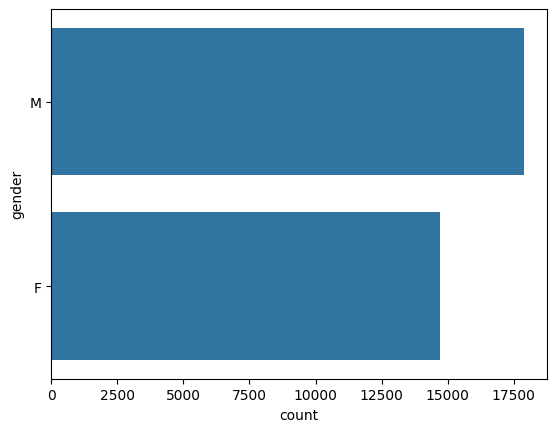

In [17]:
#Checking gender distribution
sns.countplot(studentInfo_df.gender);
#this shows that courses data is almost equally distributed on gender

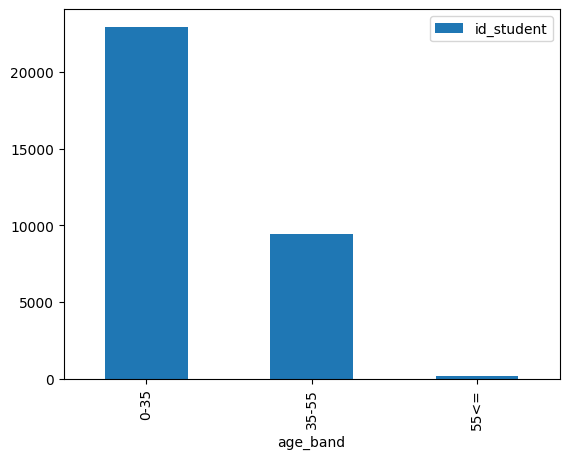

In [18]:
#Now let's try the same on age
studentInfo_df[['id_student', 'age_band']].groupby(by='age_band').count().plot.bar();
#this shows majority of students fall in age band of 0-35


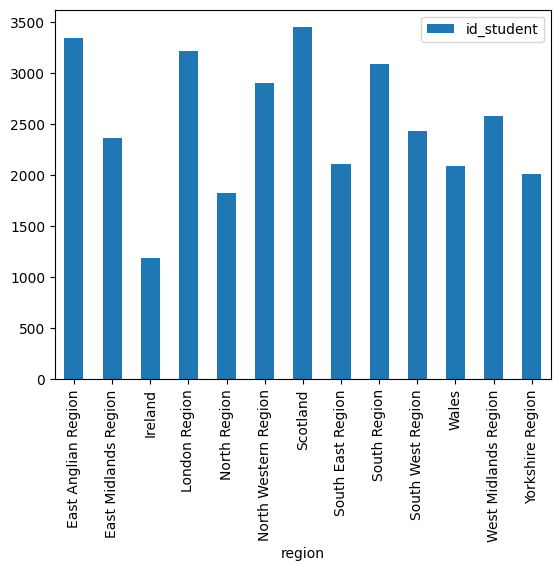

In [19]:
#Now let's try the same on region
studentInfo_df[['id_student', 'region']].groupby(by='region').count().plot.bar();

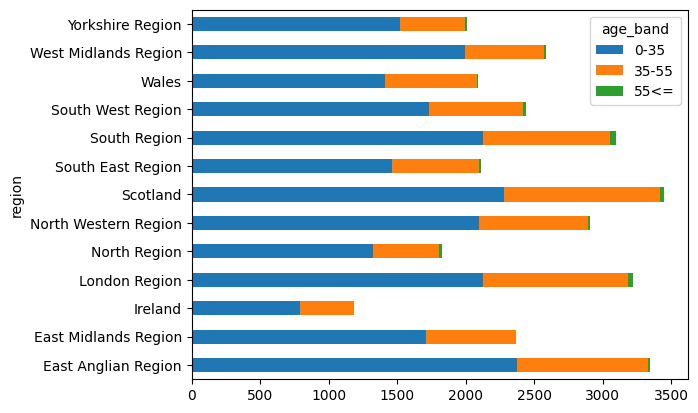

In [20]:
pd.crosstab(studentInfo_df.region, studentInfo_df.age_band).plot.barh(stacked = True);
#This is the same as above Graph but it is distributed with respect to the age ban.

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(1, 0, 'East Anglian Region'),
  Text(2, 0, 'East Midlands Region'),
  Text(3, 0, 'Ireland'),
  Text(4, 0, 'London Region'),
  Text(5, 0, 'North Region'),
  Text(6, 0, 'North Western Region'),
  Text(7, 0, 'Scotland'),
  Text(8, 0, 'South East Region'),
  Text(9, 0, 'South Region'),
  Text(10, 0, 'South West Region'),
  Text(11, 0, 'Wales'),
  Text(12, 0, 'West Midlands Region'),
  Text(13, 0, 'Yorkshire Region')])

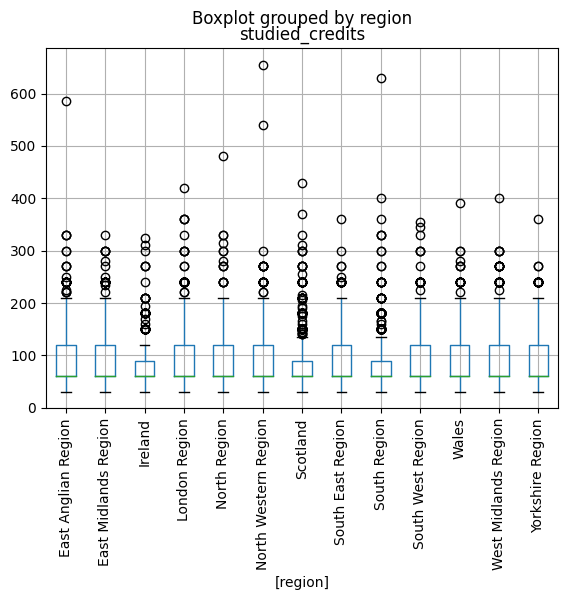

In [21]:
studentInfo_df.drop(['id_student', 'num_of_prev_attempts'], axis=1).boxplot(by = 'region')
plt.xticks(rotation = 90)
#without this, x-labels overlap

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'East Anglian Region'),
  Text(1, 0, 'Scotland'),
  Text(2, 0, 'North Western Region'),
  Text(3, 0, 'South East Region'),
  Text(4, 0, 'West Midlands Region'),
  Text(5, 0, 'Wales'),
  Text(6, 0, 'North Region'),
  Text(7, 0, 'South Region'),
  Text(8, 0, 'Ireland'),
  Text(9, 0, 'South West Region'),
  Text(10, 0, 'East Midlands Region'),
  Text(11, 0, 'Yorkshire Region'),
  Text(12, 0, 'London Region')])

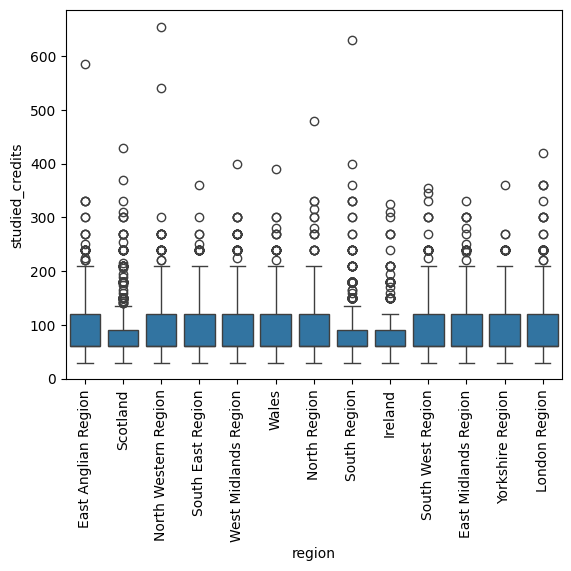

In [22]:
sns.boxplot(x = 'region', y = 'studied_credits', data=studentInfo_df)
plt.xticks(rotation = 90)

In [23]:
# selecting a subset of cols which are of importance to us and grouping them by student id and aggregating them using median
studentPerformance_df = studentInfo_df[['id_student', 'num_of_prev_attempts', 'studied_credits']].groupby('id_student').median()

In [24]:
studentPerformance_df.head()

num_of_prev_attempts  studied_credits
id_student                                       
3733                         0.0             60.0
6516                         0.0             60.0
8462                         0.5             75.0
11391                        0.0            240.0
23629                        2.0             60.0

In [25]:
# Here above if you notice, indices are random. Since we have selected it from df, we need to reset them
studentPerformance_df = studentPerformance_df.reset_index()

In [26]:
studentPerformance_df.head()

id_student  num_of_prev_attempts  studied_credits
0        3733                   0.0             60.0
1        6516                   0.0             60.0
2        8462                   0.5             75.0
3       11391                   0.0            240.0
4       23629                   2.0             60.0

In [27]:
studentProfile_df = studentInfo_df[['id_student', 'gender', 'region', 'highest_education', 'imd_band', 'age_band']].drop_duplicates()
show_basic_info(studentProfile_df)

HEAD:
   id_student gender                region      highest_education imd_band  \
0       11391      M   East Anglian Region       HE Qualification  90-100%   
1       28400      F              Scotland       HE Qualification   20-30%   
2       30268      F  North Western Region  A Level or Equivalent   30-40%   

  age_band  
0     55<=  
1    35-55  
2    35-55  
--------------------------------------------------------------------------------------------------------
SHAPE:
(28857, 6)
--------------------------------------------------------------------------------------------------------
INFO:
<class 'pandas.core.frame.DataFrame'>
Index: 28857 entries, 0 to 32592
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id_student         28857 non-null  int64 
 1   gender             28857 non-null  object
 2   region             28857 non-null  object
 3   highest_education  28857 non-null  object
 4   imd_b

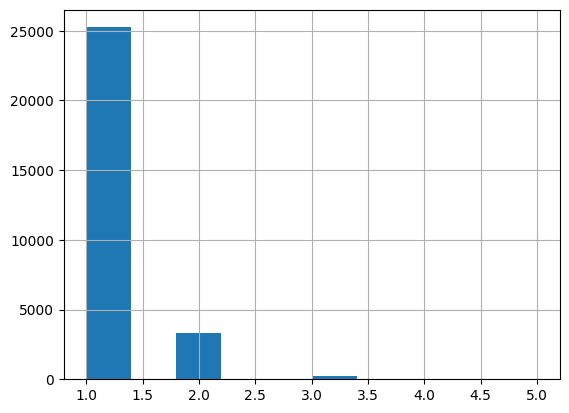

In [28]:
studentAges_df = studentInfo_df[['id_student', 'age_band']].groupby(['id_student']).count()
studentAges_df = studentAges_df.reset_index()
studentAges_df.age_band.hist();
#majority of the students fall in age band of 0-35

<Axes: xlabel='count', ylabel='code_module'>

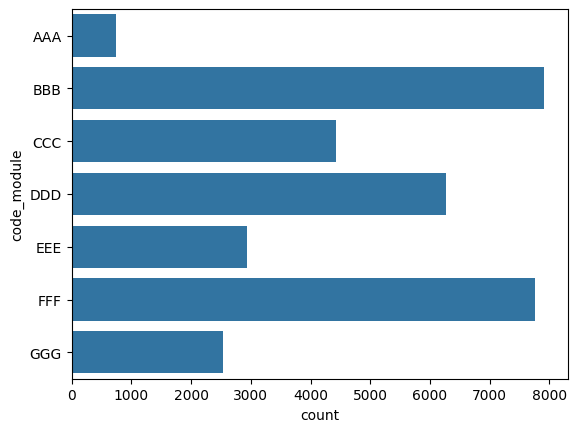

In [29]:
sns.countplot(studentInfo_df.code_module)
#course BBB and FFF are very famous

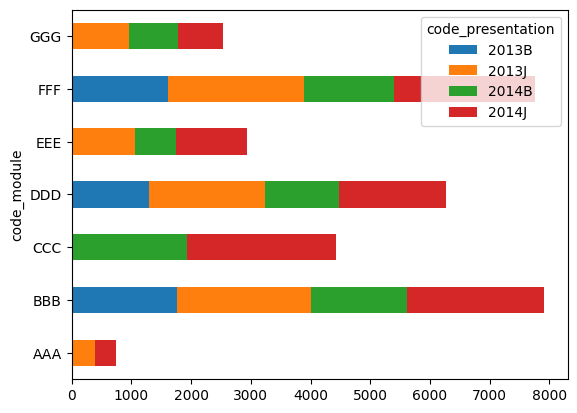

In [30]:
pd.crosstab(studentInfo_df.code_module, studentInfo_df.code_presentation).plot.barh(stacked = True);
#'B' is for courses offered in Feb and 'J' is for courses offered in Oct.
#course 'CCC' is something introduced in 2014 only.
#ourse 'AAA' has a very low student count as compared to other courses

In [31]:
studentInfo_df.head(2)

code_module code_presentation  id_student gender               region  \
0         AAA             2013J       11391      M  East Anglian Region   
1         AAA             2013J       28400      F             Scotland   

  highest_education imd_band age_band  num_of_prev_attempts  studied_credits  \
0  HE Qualification  90-100%     55<=                     0              240   
1  HE Qualification   20-30%    35-55                     0               60   

  disability final_result  
0          N         Pass  
1          N         Pass

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


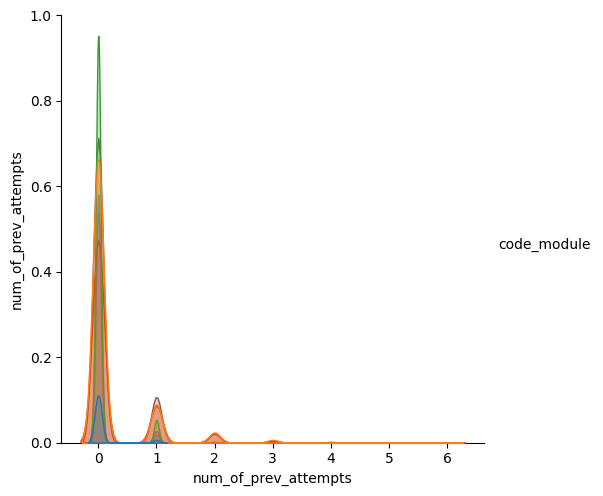

In [32]:
sns.pairplot(data=studentInfo_df[["code_module","num_of_prev_attempts"]],hue="code_module", dropna=True, size=5);

In [33]:
studentModuleLengths_df = studentInfo_df.merge(courses_df, on = ['code_module', 'code_presentation'], how='left')
studentModuleLengths_df = studentModuleLengths_df[['id_student', 'module_presentation_length']].groupby('id_student').median()
studentModuleLengths_df = studentModuleLengths_df.reset_index()

In [34]:
show_basic_info(studentModuleLengths_df)

HEAD:
   id_student  module_presentation_length
0        3733                       261.0
1        6516                       269.0
2        8462                       261.5
--------------------------------------------------------------------------------------------------------
SHAPE:
(28785, 2)
--------------------------------------------------------------------------------------------------------
INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28785 entries, 0 to 28784
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_student                  28785 non-null  int64  
 1   module_presentation_length  28785 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 449.9 KB
None
--------------------------------------------------------------------------------------------------------
DESCRIBE:
         id_student  module_presentation_length
count  2.878500e+04                2

In [35]:
studentRegistration_df['unregistered'] = np.where(pd.isnull(studentRegistration_df.date_unregistration), 0, 1)
studentRegistration_df['registered'] = np.where(pd.isnull(studentRegistration_df.date_unregistration), 0, 1)

In [36]:
studentRegistration_df['register_days'] = (np.where(pd.isnull(studentRegistration_df.date_registration), 0,
                                          studentRegistration_df.date_registration)).astype(int)
studentRegistration_df['unregister_days'] = (np.where(pd.isnull(studentRegistration_df.date_unregistration), 0,
                                            studentRegistration_df.date_unregistration)).astype(int)
studentRegDays_df = studentRegistration_df[['id_student', 'register_days',
                                   'unregister_days']].groupby(['id_student']).mean()
studentRegDays_df = studentRegDays_df.reset_index()
studentRegDays_df.head()

id_student  register_days  unregister_days
0        3733          -68.0             -8.0
1        6516          -52.0             12.0
2        8462          -87.5             68.5
3       11391         -159.0             12.0
4       23629          -47.0             12.0

In [37]:
studentInterest_df = studentRegistration_df[['id_student', 'registered', 'unregistered']].groupby(['id_student']).sum()
studentInterest_df = studentInterest_df.reset_index()

In [38]:
show_basic_info(studentInterest_df)

HEAD:
   id_student  registered  unregistered
0        3733           1             1
1        6516           1             1
2        8462           2             2
--------------------------------------------------------------------------------------------------------
SHAPE:
(28785, 3)
--------------------------------------------------------------------------------------------------------
INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28785 entries, 0 to 28784
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   id_student    28785 non-null  int64
 1   registered    28785 non-null  int64
 2   unregistered  28785 non-null  int64
dtypes: int64(3)
memory usage: 674.8 KB
None
--------------------------------------------------------------------------------------------------------
DESCRIBE:
         id_student    registered  unregistered
count  2.878500e+04  28785.000000  28785.000000
mean   7.074447e+05      1.1322

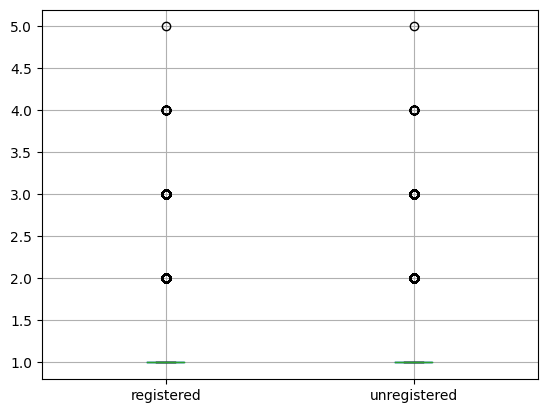

In [39]:
studentInterest_df[['registered', 'unregistered']].boxplot();

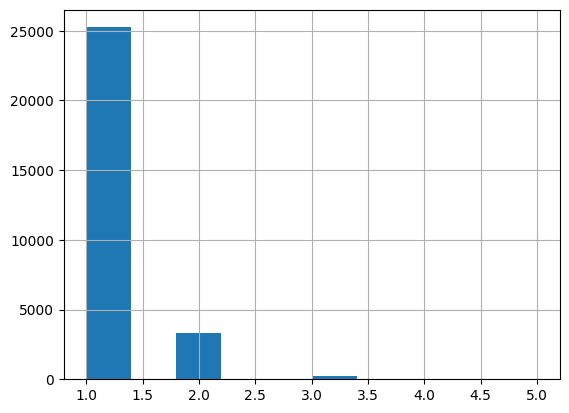

In [40]:
studentInterest_df.unregistered.hist();

In [41]:
studentAssessment_df['score'] = (np.where(pd.isnull(studentAssessment_df.score), 0, studentAssessment_df.score)).astype(int)


In [42]:
studentAssessment_df['assessment_mean'] = studentAssessment_df['score'].groupby(studentAssessment_df['id_assessment']) \
.transform('mean')

In [43]:
studentAssessment_df['score_std'] = studentAssessment_df.score/studentAssessment_df.assessment_mean

In [44]:
studentScoring_df = studentAssessment_df[['id_student',
                                          'score_std']].groupby(['id_student']).median()
studentScoring_df = studentScoring_df.reset_index()
studentScoring_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23369 entries, 0 to 23368
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_student  23369 non-null  int64  
 1   score_std   23369 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 365.3 KB


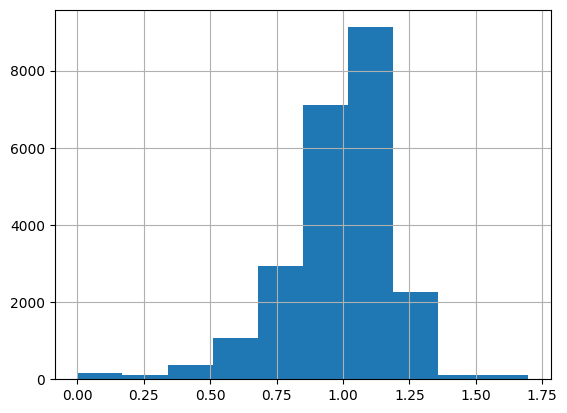

In [45]:
studentScoring_df.score_std.hist();

In [46]:
studentVle_df.shape

(10655280, 7)

In [47]:
show_basic_info(studentVle_df)

HEAD:
   Unnamed: 0 code_module code_presentation  id_student  id_site  date  \
0           0         AAA             2013J       28400   546652   -10   
1           1         AAA             2013J       28400   546652   -10   
2           2         AAA             2013J       28400   546652   -10   

   sum_click  
0          4  
1          1  
2          1  
--------------------------------------------------------------------------------------------------------
SHAPE:
(10655280, 7)
--------------------------------------------------------------------------------------------------------
INFO:
<class 'pandas.core.frame.DataFrame'>
Index: 10655280 entries, 0 to 155279
Data columns (total 7 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Unnamed: 0         int64 
 1   code_module        object
 2   code_presentation  object
 3   id_student         int64 
 4   id_site            int64 
 5   date               int64 
 6   sum_click          int64 
dtypes: int64(

In [48]:
studentVle_df = studentVle_df.merge(vle_df, on = 'id_site', how = 'left')

(array([      0.,  500000., 1000000., 1500000., 2000000., 2500000.,
        3000000.]),
 [Text(0.0, 0, '0.0'),
  Text(500000.0, 0, '0.5'),
  Text(1000000.0, 0, '1.0'),
  Text(1500000.0, 0, '1.5'),
  Text(2000000.0, 0, '2.0'),
  Text(2500000.0, 0, '2.5'),
  Text(3000000.0, 0, '3.0')])

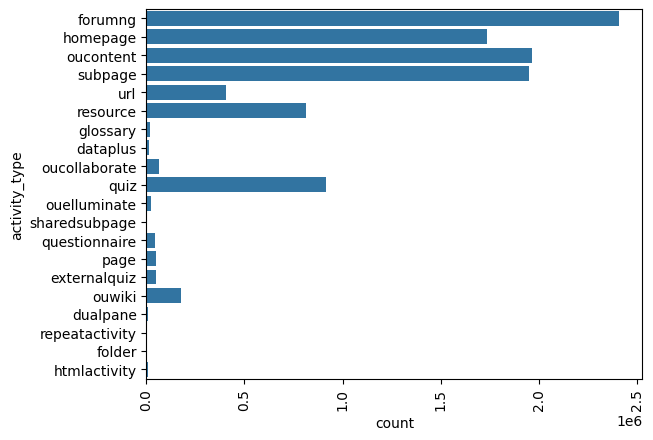

In [49]:
sns.countplot(studentVle_df.activity_type)
plt.xticks(rotation = 90)

In [50]:
studentInteractivity_df = studentVle_df[['id_student',
                                     'activity_type', 'sum_click']].groupby(['id_student', 'activity_type']).mean()
studentInteractivity_df = studentInteractivity_df.reset_index()
studentInteractivity_df.head()
#pivoting will help us reduce multiple rows per student to one single row with multiple columns
#After this we can visualize the columns with missing data

id_student activity_type  sum_click
0        6516      dataplus   5.250000
1        6516       forumng   2.577143
2        6516      homepage   3.145570
3        6516     oucontent   8.179348
4        6516      resource   1.631579

In [51]:
import missingno as msno

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26074 entries, 0 to 26073
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_student      26074 non-null  int64  
 1   dataplus        26074 non-null  float64
 2   dualpane        26074 non-null  float64
 3   externalquiz    26074 non-null  float64
 4   folder          26074 non-null  float64
 5   forumng         26074 non-null  float64
 6   glossary        26074 non-null  float64
 7   homepage        26074 non-null  float64
 8   htmlactivity    26074 non-null  float64
 9   oucollaborate   26074 non-null  float64
 10  oucontent       26074 non-null  float64
 11  ouelluminate    26074 non-null  float64
 12  ouwiki          26074 non-null  float64
 13  page            26074 non-null  float64
 14  questionnaire   26074 non-null  float64
 15  quiz            26074 non-null  float64
 16  repeatactivity  26074 non-null  float64
 17  resource        26074 non-null 

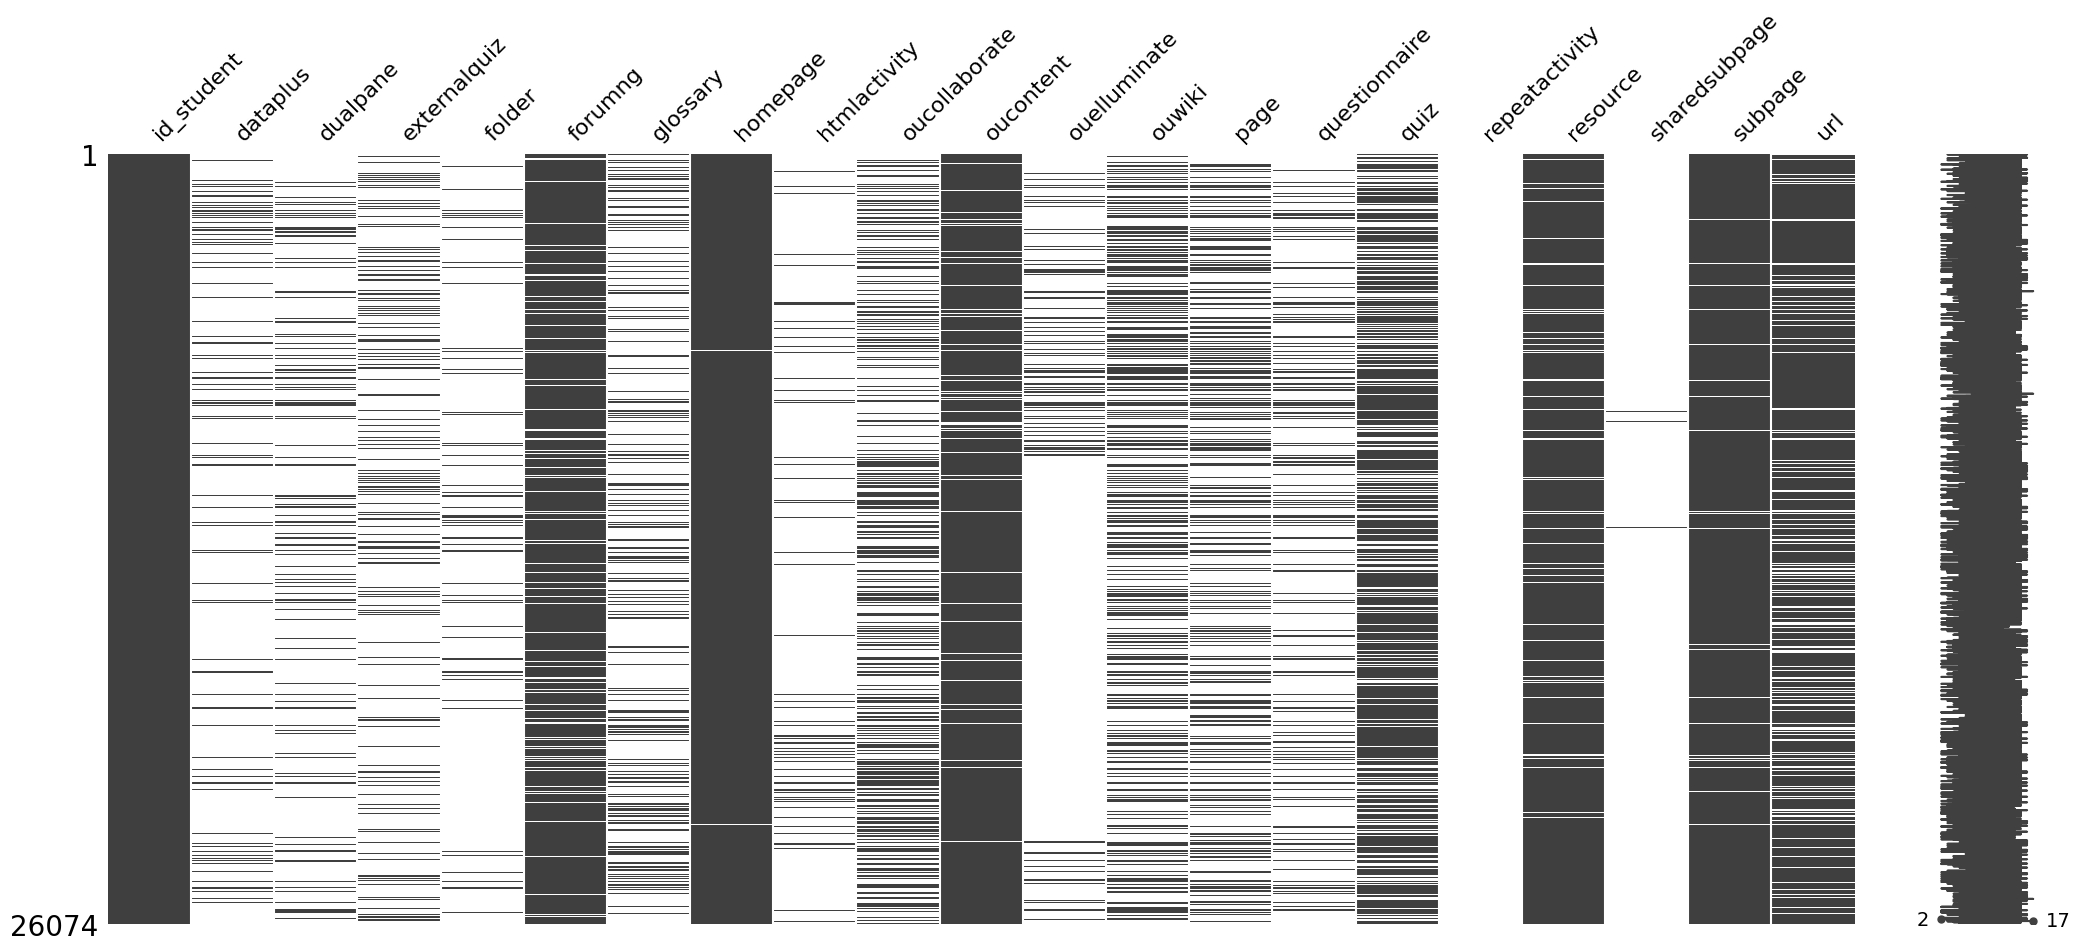

In [52]:
studentInteractivity_df = studentInteractivity_df.pivot(index='id_student',
                                                    columns='activity_type', values='sum_click')
studentInteractivity_df = studentInteractivity_df.reset_index()
msno.matrix(studentInteractivity_df)
studentInteractivity_df = studentInteractivity_df.fillna(0)
studentInteractivity_df.info()

In [53]:
studentInteractivity_df = studentInteractivity_df[['id_student', 'forumng', 'homepage', 'oucollaborate',
       'oucontent', 'page', 'questionnaire', 'quiz',
       'resource', 'subpage', 'url']]

In [54]:
merged_data = studentInfo_df.merge(studentRegistration_df, on=['id_student', 'code_module', 'code_presentation'], how='left')\
                          .merge(studentAssessment_df, on='id_student', how='left')\
                          .merge(assessments_df, on=['id_assessment', 'code_module', 'code_presentation'], how='left')\
                          .merge(courses_df, on=['code_module', 'code_presentation'], how='left')

In [55]:
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import k_means
from sklearn.metrics import silhouette_score

In [56]:
# Scaling the data to bring into one range
sc = RobustScaler()

#Merging the data


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import joblib



# Display basic info to check for missing values
print("\nBasic info of the dataset:")
print(merged_data.info())

# Label Encoding for categorical variables
label_encoders = {}
categorical_columns = ['code_module', 'code_presentation', 'gender', 'region', 'highest_education', 'imd_band', 'age_band', 'disability', 'final_result', 'assessment_type']

for column in categorical_columns:
    le = LabelEncoder()
    merged_data[column] = le.fit_transform(merged_data[column])
    label_encoders[column] = le



# Define features and target
X = merged_data.drop(columns=['final_result'])
y = merged_data['final_result']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Initialize and train the model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))



Basic info of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213166 entries, 0 to 213165
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   code_module                 213166 non-null  object 
 1   code_presentation           213166 non-null  object 
 2   id_student                  213166 non-null  int64  
 3   gender                      213166 non-null  object 
 4   region                      213166 non-null  object 
 5   highest_education           213166 non-null  object 
 6   imd_band                    213166 non-null  object 
 7   age_band                    213166 non-null  object 
 8   num_of_prev_attempts        213166 non-null  int64  
 9   studied_credits             213166 non-null  int64  
 10  disability                  213166 non-null  object 
 11  final_result                213166 non-null  object 
 12  date_registration           213166 non-null 

In [59]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


# Convert 'date_registration' to datetime
merged_data['date_registration'] = pd.to_datetime(merged_data['date_registration'], errors='coerce')

# Handle missing values
imputer = SimpleImputer(strategy='mean')
merged_data[['score']] = imputer.fit_transform(merged_data[['score']])

# Ensure data is sorted by date
merged_data.sort_values(by='date_registration', inplace=True)

# Set the index to date_registration
merged_data.set_index('date_registration', inplace=True)

# Display the first few rows to verify the changes
print("First few rows of the dataset after preparation:")
print(merged_data.head())

# Split the data into training and testing sets
train_data = merged_data.loc[:'2022-12-31']
test_data = merged_data.loc['2023-01-01':]

# Separate target variable
y_train = train_data['score']
y_test = test_data['score']



First few rows of the dataset after preparation:
                               code_module  code_presentation  id_student  \
date_registration                                                           
1969-12-31 23:59:59.999999678            1                  2      571732   
1969-12-31 23:59:59.999999679            1                  2      570721   
1969-12-31 23:59:59.999999679            1                  2      320661   
1969-12-31 23:59:59.999999680            1                  2      534428   
1969-12-31 23:59:59.999999680            1                  2      534428   

                               gender  region  highest_education  imd_band  \
date_registration                                                            
1969-12-31 23:59:59.999999678       0       7                  2         7   
1969-12-31 23:59:59.999999679       0       1                  1         1   
1969-12-31 23:59:59.999999679       0       4                  0         2   
1969-12-31 23:59:59.9

In [66]:
arima_model = sm.tsa.ARIMA(y_train, order=(1, 1, 1))
arima_result = arima_model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [67]:
print("ARIMA Model Summary:")
print(arima_result.summary())


ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  score   No. Observations:               213166
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -920060.364
Date:                Sat, 15 Jun 2024   AIC                        1840126.728
Time:                        23:23:43   BIC                        1840157.538
Sample:                             0   HQIC                       1840135.771
                             - 213166                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2525      0.002    137.856      0.000       0.249       0.256
ma.L1         -0.9933      0.000  -3961.300      0.000      -0.994      -0.993
sigma2       328.4730      0.73

In [68]:
start = len(y_train)
end = start + len(y_test) - 1

forecast = arima_result.get_forecast(steps=len(y_test))
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()


ValueError: Prediction must have `end` after `start`.

In [65]:
# Fit the ARIMA model
arima_model = sm.tsa.ARIMA(y_train, order=(1, 1, 1))
arima_result = arima_model.fit()

# Display the model summary
print("ARIMA Model Summary:")
print(arima_result.summary())

# Forecast future values
n_forecast_steps = len(y_test)
forecast = arima_result.get_forecast(steps=n_forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 8))
plt.plot(y_train.index, y_train, label='Training Data')
plt.plot(y_test.index, y_test, label='Actual Data')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast')
plt.fill_between(forecast_conf_int.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Score')
plt.show()

# Evaluate the model
mse = mean_squared_error(y_test, forecast_mean)
print(f"Mean Squared Error: {mse}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  score   No. Observations:               213166
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -920060.364
Date:                Sat, 15 Jun 2024   AIC                        1840126.728
Time:                        22:52:32   BIC                        1840157.538
Sample:                             0   HQIC                       1840135.771
                             - 213166                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2525      0.002    137.856      0.000       0.249       0.256
ma.L1         -0.9933      0.000  -3961.300      0.000      -0.994      -0.993
sigma2       328.4730      0.73

ValueError: Prediction must have `end` after `start`.

#Fit the ARIMAX Model


#forcast and evaluation